In [1]:
## Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.stats import ttest_ind
from datetime import datetime
import seaborn as sn

In [2]:
df=pd.read_csv('screening_exercise_orders_v201810.csv',parse_dates=['date'])
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:00,198.5,1
1,1001,0,2017-01-01 00:29:00,338.0,1
2,1002,1,2017-01-01 01:30:00,733.0,1
3,1003,1,2017-01-01 01:34:00,772.0,1
4,1004,0,2017-01-01 03:11:00,508.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
customer_id         13471 non-null int64
gender              13471 non-null int64
date                13471 non-null datetime64[ns]
value               13471 non-null float64
predicted_gender    13471 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 526.3 KB


In [4]:
def sort(DF,colummn_name,n):
    DF= DF.sort_values(by=[colummn_name], ascending=True)
    return DF.head(n).reset_index(drop =True)

In [5]:
sort(df,'customer_id',10)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:00,198.5,1
1,1001,0,2017-01-01 00:29:00,338.0,1
2,1002,1,2017-01-01 01:30:00,733.0,1
3,1002,1,2017-02-19 21:35:00,176.0,1
4,1002,1,2017-01-23 04:33:00,148.6,1
5,1003,1,2017-01-01 01:34:00,772.0,1
6,1003,1,2017-01-20 05:56:00,425.5,1
7,1003,1,2017-04-25 09:54:00,0.0,1
8,1003,1,2017-04-26 02:37:00,704.0,1
9,1004,0,2017-01-01 03:11:00,508.0,1


In [6]:
def WeekbyYear(DF):
    DF['WeekNumber']=DF.date.dt.week
    Count=DF.groupby('WeekNumber')['WeekNumber'].agg(['count'])
    return Count.plot()

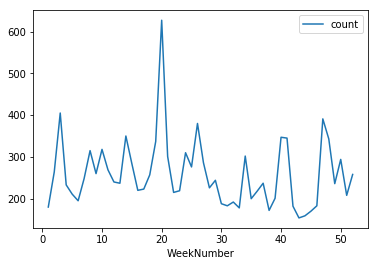

In [7]:
WeekbyYear(df)

In [8]:
def GenderMeanDifference(DF):    
    '''
    H0=mean of Gender are Equal
    H1=Difference between mean in gender
    '''
    cat0=DF[DF['gender']==0]
    cat1=DF[DF['gender']==1]
    t_value,p_value=ttest_ind(cat0['value'], cat1['value'])
    if p_value<.05:
        print('reject the null hypothesis in favour of the alternative hypothesis for 95% of confidence interval')
    return p_value
    
    

In [9]:
GenderMeanDifference(df)

reject the null hypothesis in favour of the alternative hypothesis for 95% of confidence interval


0.04820130539124317

[[3349 3410]
 [1463 5249]]


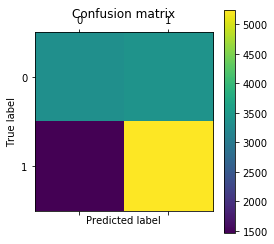

In [10]:
# Compute confusion matrix
cm = confusion_matrix(df['gender'], df['predicted_gender'])
#print(cm)
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()